In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import data
from skimage import color
import scipy.sparse
import scipy.sparse.linalg
import random
import sys

In [2]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

In [3]:
def gradient(f, grad_f, x0, KMAX, tolf, tolx, alpha = None):
    i = 0
    x_k = [x0]
    x_kOld = x0
    f_val = []
    grad = []
    err = []
    grad_0 = np.linalg.norm(grad_f(x0), 2)
    while True:
        x_kOld = x_k[i]
        if alpha is None:
            a = backtracking(f, grad_f, x_k[i])
        else:
            a = alpha
        x_k.append(x_kOld - a * grad_f(x_kOld))

        f_val.append(f(x_k[i]))
        grad_val =  grad_f(x_k[i])
        err_val = np.linalg.norm(grad_val, 2)
        grad.append(grad_val)
        err.append(err_val)

        if i > KMAX or err_val < tolf * grad_0 or np.linalg.norm(x_k[i + 1] - x_kOld, 2) < tolx:
            return (x_k, i, f_val, grad, err, x_k[i])
        i +=1


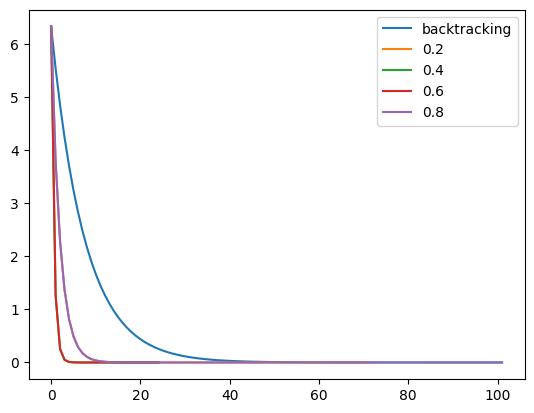

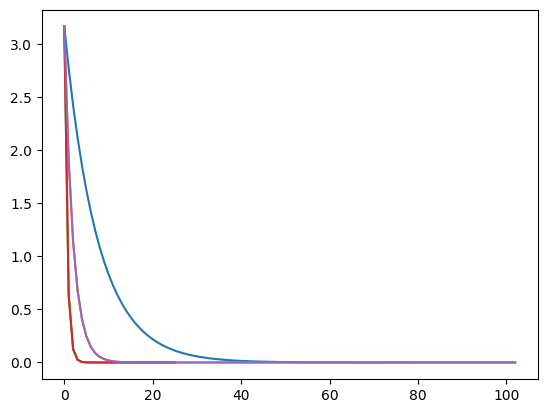

In [25]:
fx1 = lambda x: (x[0] - 3)**2 + (x[1] - 1)**2
gradfx1 = lambda x: np.array([2 * x[0] - 6, 2 * x[1] - 2])
m1 = gradient(fx1, gradfx1, np.array([0, 0]), 100, sys.float_info.min * 2, sys.float_info.min * 2)
m1_1 = gradient(fx1, gradfx1, np.array([0, 0]), 100, sys.float_info.min * 2, sys.float_info.min * 2, 0.2)
m1_2 = gradient(fx1, gradfx1, np.array([0, 0]), 100, sys.float_info.min * 2, sys.float_info.min * 2, 0.4)
m1_3 = gradient(fx1, gradfx1, np.array([0, 0]), 100, sys.float_info.min * 2, sys.float_info.min * 2, 0.6)
m1_4 = gradient(fx1, gradfx1, np.array([0, 0]), 100, sys.float_info.min * 2, sys.float_info.min * 2, 0.8)



plt.plot(range(0, m1[1] + 1),m1[4], label = "backtracking")
plt.plot(range(0, m1_1[1] + 1),m1_1[4], label = "0.2")
plt.plot(range(0, m1_2[1] + 1),m1_2[4], label = "0.4")
plt.plot(range(0, m1_3[1] + 1),m1_3[4], label = "0.6")
plt.plot(range(0, m1_4[1] + 1),m1_4[4], label = "0.8")
plt.legend()
plt.show()

error1 = [np.linalg.norm(m1[5] - x) for x in m1[0]]
error1_1 = [np.linalg.norm(m1_1[5] - x) for x in m1_1[0]]
error1_2 = [np.linalg.norm(m1_2[5] - x) for x in m1_2[0]]
error1_3 = [np.linalg.norm(m1_3[5] - x) for x in m1_3[0]]
error1_4 = [np.linalg.norm(m1_4[5] - x) for x in m1_4[0]]

plt.plot(error1)
plt.plot(error1_1)
plt.plot(error1_2)
plt.plot(error1_3)
plt.plot(error1_4)
plt.show()

# print(m1[0][-10:][0])
# cs = plt.contourf(m1[0][-30:])
# cs.changed()
# plt.plot(m1[0][-10:][:2])
# plt.show()

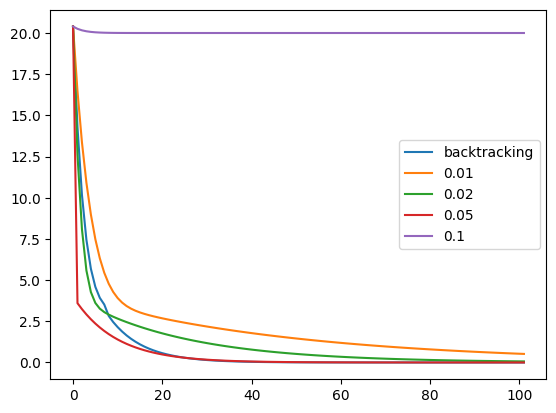

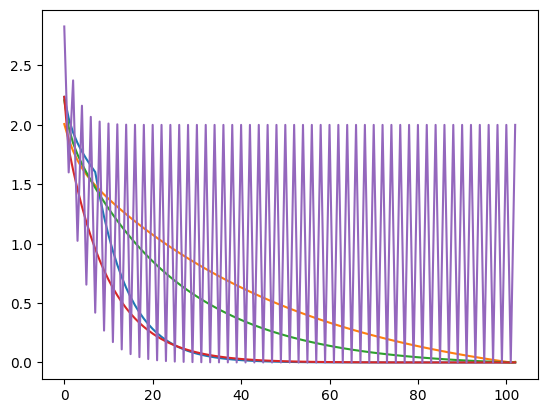

In [26]:
fx2 = lambda x: 10 * (x[0] - 1)**2 + (x[1] - 2)**2
gradfx2 = lambda x: np.array([20 * x[0] - 20, 2 * x[1] - 4])
m2 = gradient(fx2, gradfx2, np.array([0, 0]), 100, sys.float_info.min * 2, sys.float_info.min * 2)
m2_1 = gradient(fx2, gradfx2, np.array([0, 0]), 100, sys.float_info.min * 2, sys.float_info.min * 2, 0.01)
m2_2 = gradient(fx2, gradfx2, np.array([0, 0]), 100, sys.float_info.min * 2, sys.float_info.min * 2, 0.02)
m2_3 = gradient(fx2, gradfx2, np.array([0, 0]), 100, sys.float_info.min * 2, sys.float_info.min * 2, 0.05)
m2_4 = gradient(fx2, gradfx2, np.array([0, 0]), 100, sys.float_info.min * 2, sys.float_info.min * 2, 0.1)


plt.plot(range(0, m2[1] + 1),m2[4], label = "backtracking")
plt.plot(range(0, m2_1[1] + 1),m2_1[4], label = "0.01")
plt.plot(range(0, m2_2[1] + 1),m2_2[4], label = "0.02")
plt.plot(range(0, m2_3[1] + 1),m2_3[4], label = "0.05")
plt.plot(range(0, m2_4[1] + 1),m2_4[4], label = "0.1")
plt.legend()
plt.show()

error2 = [np.linalg.norm(m2[5] - x) for x in m2[0]]
error2_1 = [np.linalg.norm(m2_1[5] - x) for x in m2_1[0]]
error2_2 = [np.linalg.norm(m2_2[5] - x) for x in m2_2[0]]
error2_3 = [np.linalg.norm(m2_3[5] - x) for x in m2_3[0]]
error2_4 = [np.linalg.norm(m2_4[5] - x) for x in m2_4[0]]

plt.plot(error2)
plt.plot(error2_1)
plt.plot(error2_2)
plt.plot(error2_3)
plt.plot(error2_4)
plt.show()

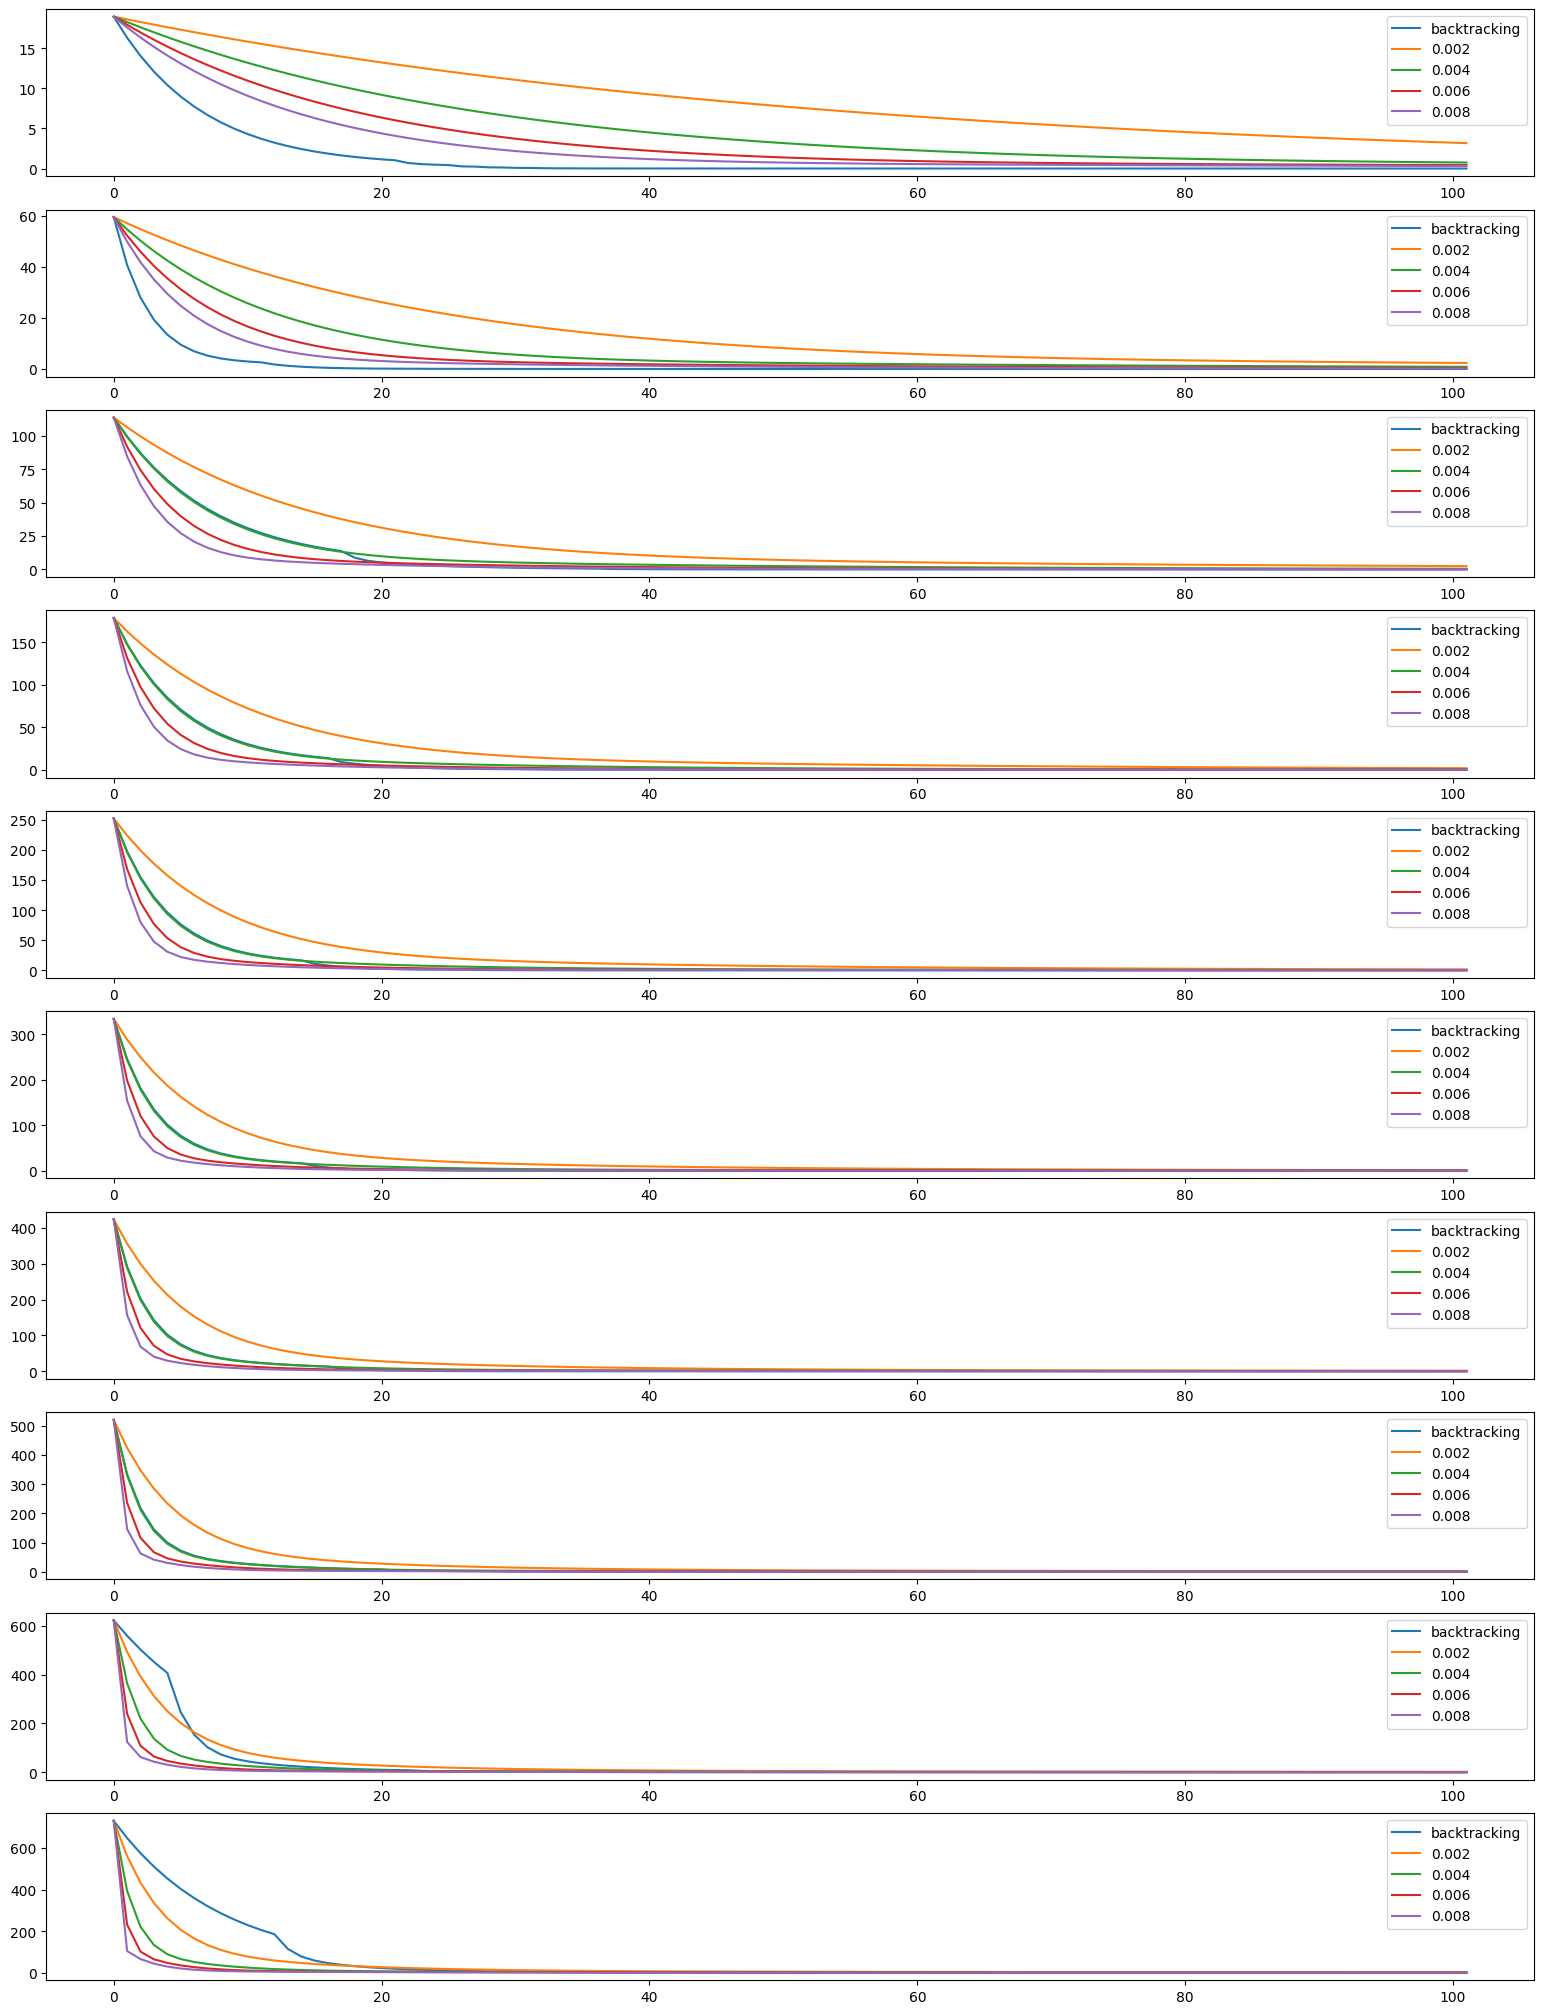

In [47]:
rg = [5,10,15,20,25,30,35,40,45,50]
m3R = []
m4R = []
fig, axs = plt.subplots(len(rg), figsize=(19.2,25.6))
j = 0
for i in rg:
    v = np.linspace(0,1, num = i)
    A = np.vander(v, i)
    x_true = np.ones(i)
    b = A @ x_true
    
    fx3 = lambda x: 1/2 * np.linalg.norm(A @ x - b, 2)**2
    gradfx3 = lambda x: 1/2 * 2 * (A @ x - b).T @ A 
    m3 = gradient(fx3, gradfx3, np.zeros(i), 100, sys.float_info.min * 2, sys.float_info.min * 2)
    m3_1 = gradient(fx3, gradfx3, np.zeros(i), 100, sys.float_info.min * 2, sys.float_info.min * 2, 0.002)
    m3_2 = gradient(fx3, gradfx3, np.zeros(i), 100, sys.float_info.min * 2, sys.float_info.min * 2, 0.004)
    m3_3 = gradient(fx3, gradfx3, np.zeros(i), 100, sys.float_info.min * 2, sys.float_info.min * 2, 0.006)
    m3_4 = gradient(fx3, gradfx3, np.zeros(i), 100, sys.float_info.min * 2, sys.float_info.min * 2, 0.008)
    axs[j].plot(range(0, m3[1] + 1),m3[4], label = "backtracking")
    axs[j].plot(range(0, m3_1[1] + 1),m3_1[4], label = "0.002")
    axs[j].plot(range(0, m3_2[1] + 1),m3_2[4], label = "0.004")
    axs[j].plot(range(0, m3_3[1] + 1),m3_3[4], label = "0.006")
    axs[j].plot(range(0, m3_4[1] + 1),m3_4[4], label = "0.008")
    axs[j].legend()
    m3R.append(m3)
    j += 1
    
plt.show()

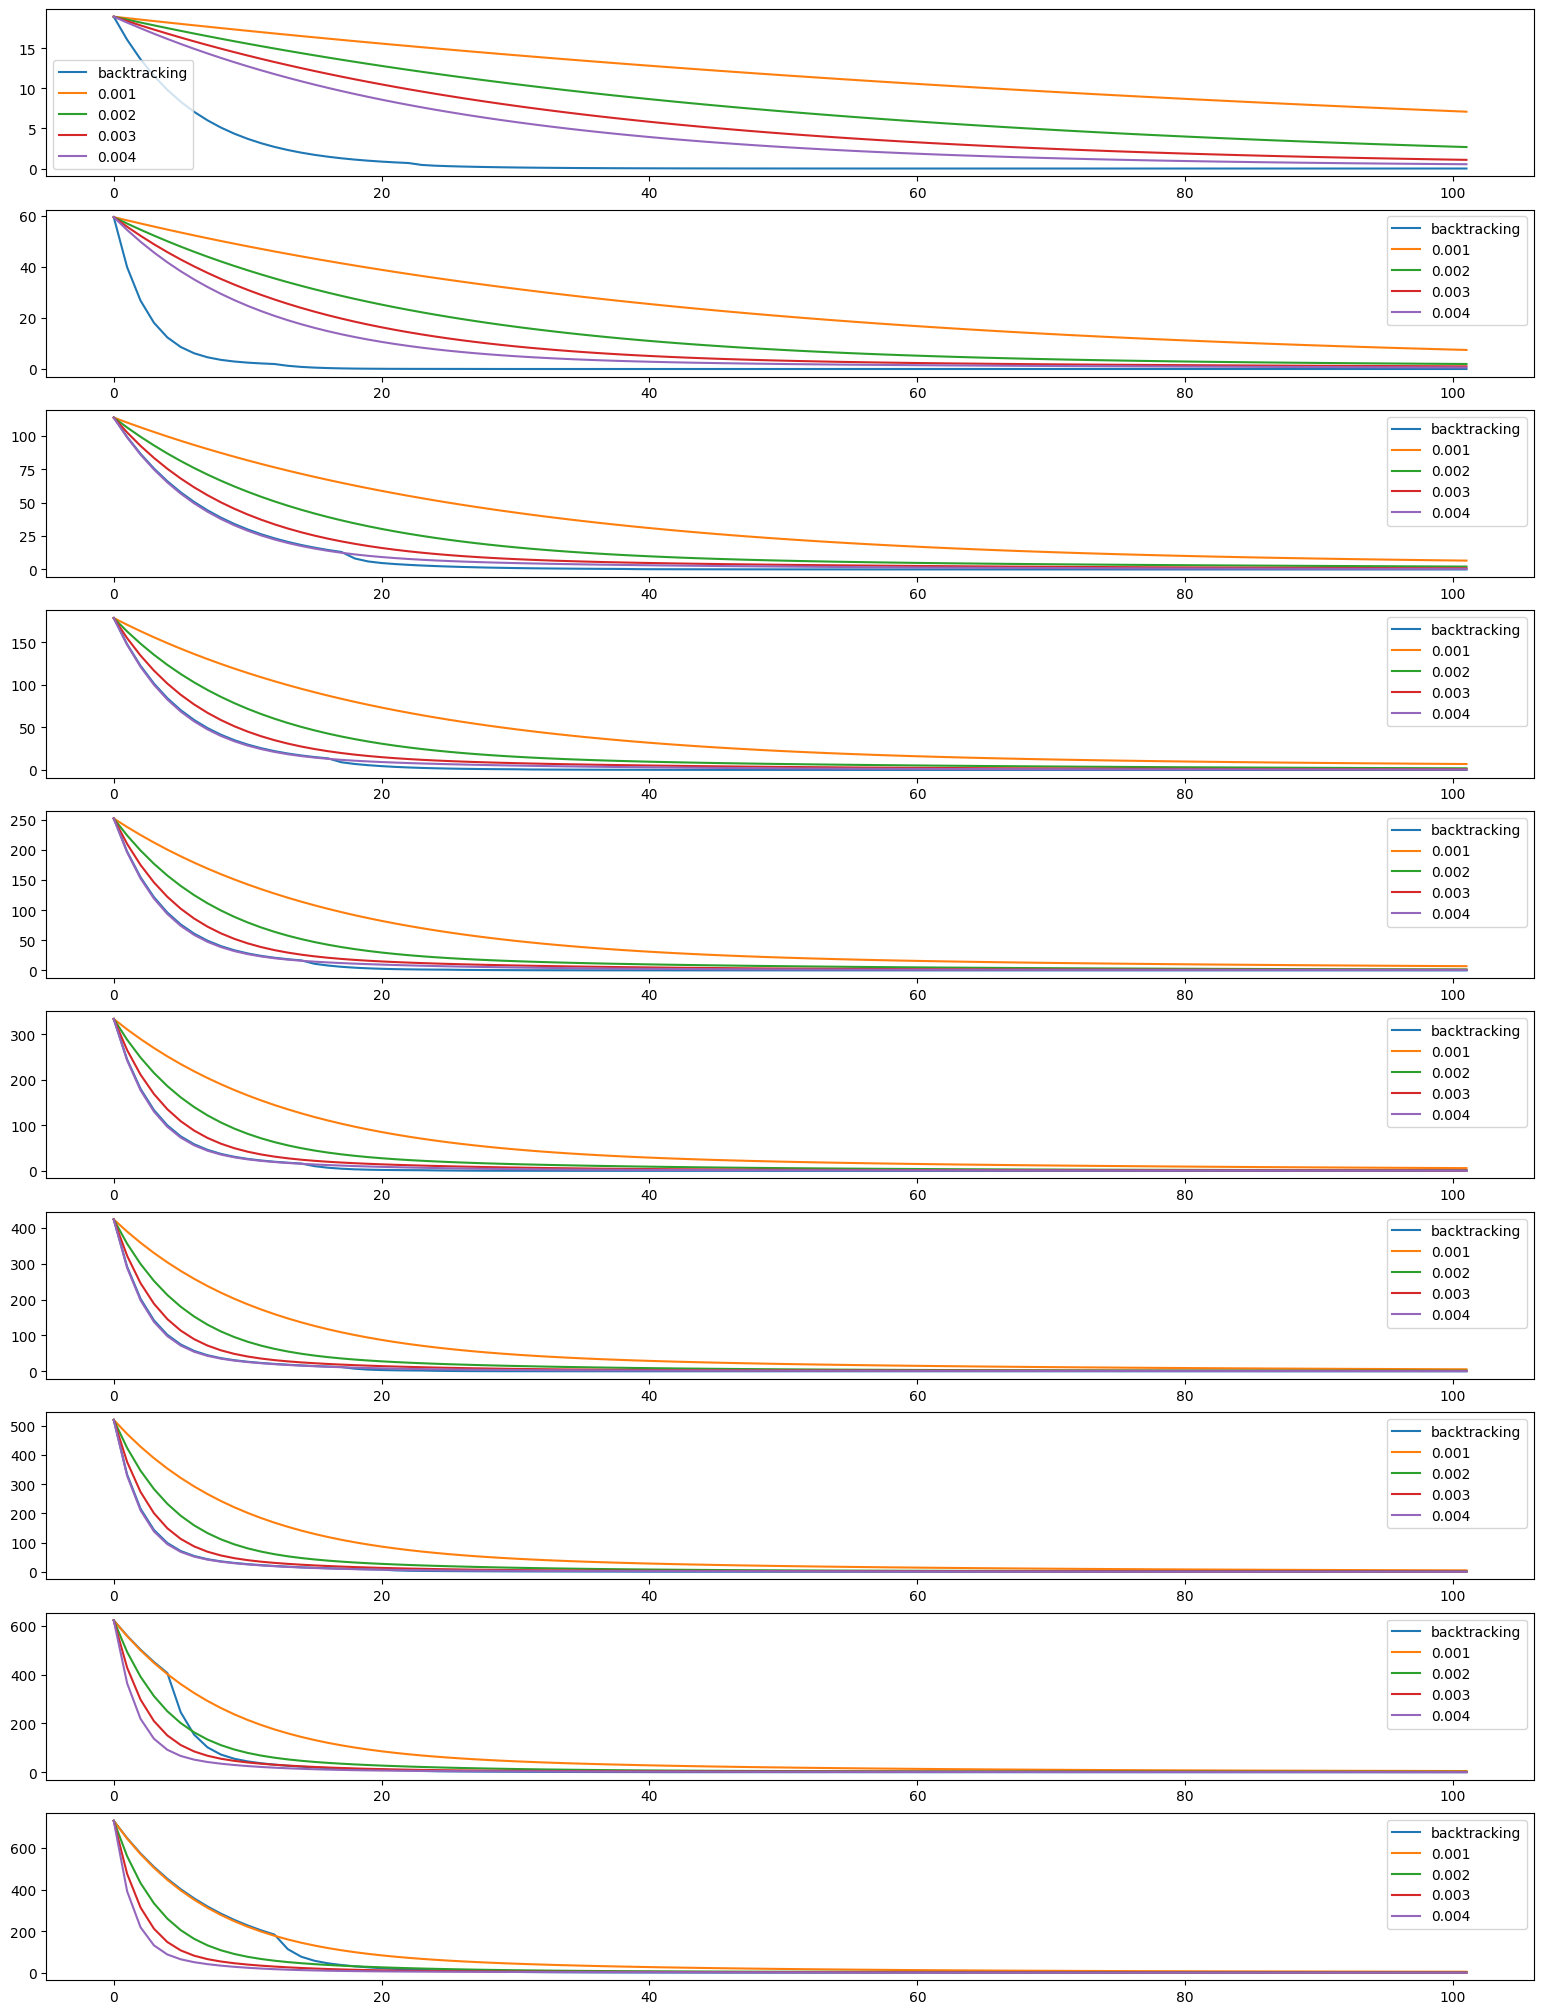

In [48]:
rg = [5,10,15,20,25,30,35,40,45,50]
m3R = []
m4R = []
j = 0
fig, axs = plt.subplots(len(rg), figsize=(19.2,25.6))
for i in rg:
    v = np.linspace(0,1, num = i)
    A = np.vander(v, i)
    x_true = np.ones(i)
    b = A @ x_true
    
    l = random.random()
    fx4 = lambda x: 1/2 * np.linalg.norm(A @ x - b, 2)**2 + l / 2 * np.linalg.norm(x, 2)**2
    gradfx4 = lambda x: 1/2 * 2 * (A @ x - b).T @ A + l / 2 * 2 * x.T
    m4 = gradient(fx4, gradfx4, np.zeros(i), 100, sys.float_info.min * 2, sys.float_info.min * 2)
    m4_1 = gradient(fx4, gradfx4, np.zeros(i), 100, sys.float_info.min * 2, sys.float_info.min * 2, 0.001)
    m4_2 = gradient(fx4, gradfx4, np.zeros(i), 100, sys.float_info.min * 2, sys.float_info.min * 2, 0.002)
    m4_3 = gradient(fx4, gradfx4, np.zeros(i), 100, sys.float_info.min * 2, sys.float_info.min * 2, 0.003)
    m4_4 = gradient(fx4, gradfx4, np.zeros(i), 100, sys.float_info.min * 2, sys.float_info.min * 2, 0.004)
    
    axs[j].plot(range(0, m4[1] + 1),m4[4], label = "backtracking")
    axs[j].plot(range(0, m4_1[1] + 1),m4_1[4], label = "0.001")
    axs[j].plot(range(0, m4_2[1] + 1),m4_2[4], label = "0.002")
    axs[j].plot(range(0, m4_3[1] + 1),m4_3[4], label = "0.003")
    axs[j].plot(range(0, m4_4[1] + 1),m4_4[4], label = "0.004")
    axs[j].legend()
    m4R.append(m4)
    j += 1
plt.show()

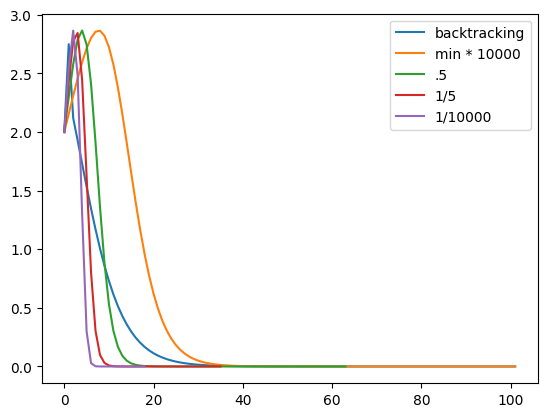

In [5]:
fx5 = lambda x: x ** 4 + x ** 3 - 2 * x ** 2 - 2 * x 
gradfx5 = lambda x: 4 * x ** 3 + 3 * x ** 2 - 4 * x - 2

m5 = gradient(fx5, gradfx5, np.array([0]), 100, sys.float_info.min * 2, sys.float_info.min * 2)
m5_1 = gradient(fx5, gradfx5, np.array([0]), 100, sys.float_info.min * 2, sys.float_info.min * 2, 0.02)
m5_2 = gradient(fx5, gradfx5, np.array([0]), 100, sys.float_info.min * 2, sys.float_info.min * 2, 0.04)
m5_3 = gradient(fx5, gradfx5, np.array([0]), 100, sys.float_info.min * 2, sys.float_info.min * 2, 0.06)
m5_4 = gradient(fx5, gradfx5, np.array([0]), 100, sys.float_info.min * 2, sys.float_info.min * 2, 0.08)

plt.plot(range(0, m5[1] + 1),m5[4], label = "backtracking")
plt.plot(range(0, m5_1[1] + 1),m5_1[4], label = "min * 10000")
plt.plot(range(0, m5_2[1] + 1),m5_2[4], label = ".5")
plt.plot(range(0, m5_3[1] + 1),m5_3[4], label = "1/5")
plt.plot(range(0, m5_4[1] + 1),m5_4[4], label = "1/10000")
plt.legend()
plt.show()


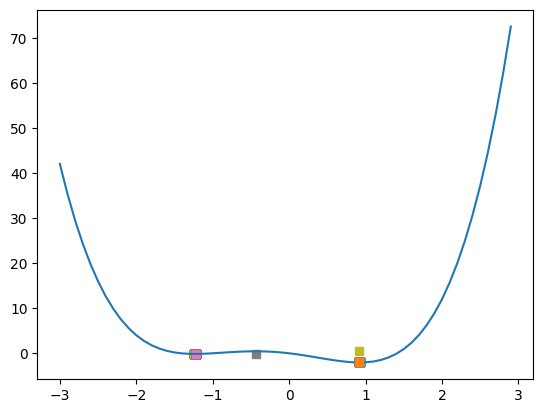

In [7]:
x = np.arange(-3,3, step = 0.1)
y = [fx5(i) for i in x]

mx = gradient(fx5, gradfx5, np.array([0]), 100, 0.001, 0.001)
x_kf = mx[5]
y_kf = fx5(x_kf)


i = -3
mx_1 = gradient(fx5, gradfx5, np.array([i]), 100, 0.001, 0.001)
x_kf1 = mx_1[5]
y_kf1 = fx5(x_kf1)

while i <=3:
    i += 0.02
    mx_1 = gradient(fx5, gradfx5, np.array([i]), 100, 0.001, 0.001)
    x_kf1 = mx_1[5]
    plt.plot(x_kf1, y_kf1, "s")
    y_kf1 = fx5(x_kf1)

plt.plot(x, y)
plt.plot(x_kf, y_kf, "s")
plt.show()

In [13]:
def getHat(X, w):
    X_hat = np.concatenate((np.ones((1,X.shape[1])), X), axis = 0)
    w_hat = np.concatenate((np.ones((1,w.shape[1])), w), axis = 0)
    return (X_hat, w_hat)

def fw(w, x):
    return sigmoid(x.T @ w)

def sigmoid(z): 
    sig = 1 / (1 + np.exp(-z))
    return sig

def grad_l(par):
    w, x, y = par
    N = np.size(y)
    sigmoid_value = sigmoid(x.T @ w)
    second_term = (sigmoid_value * ( 1 - sigmoid_value) * (sigmoid_value - y))
    return 1/N * x @ second_term

def l(par):
    w, x, y = par
    N = np.size(y)
    # 2 / N * x @ (fw(w, x) * 1 - fw(w, x)
    return  1/(2 * N) *np.linalg.norm(fw(w, x) - y, 2)**2

def SGD(l, grad_l, w0, data, batch_size, n_epoch, alpha):
    x, y = data
    d, N = x.shape
    y = y.reshape((N,1))
    epoch_iter = N // batch_size
    x_copy = np.copy(x)
    y_copy = np.copy(y)
    W_hat = w0
    w = [w0]
    f_val = [l((W_hat, x, y))]
    err = [np.linalg.norm(grad_l((W_hat, x, y)),2) ** 2]
    grads = [grad_l((W_hat, x, y))]
    for epoch in range(n_epoch):
        for k in range(epoch_iter):
            indexes = np.arange(x.shape[1])
            batch_idx = np.random.choice(indexes, batch_size)
            
            mask = np.zeros((x.shape[1], ), dtype=bool)
            mask[batch_idx] = True
            x_batch = x[:, mask]
            y_batch = y[mask]
            
            x = x[:, ~ mask]
            y = y[~ mask]
            grad_value = grad_l((W_hat, x_batch, y_batch))
            W_hat = W_hat - alpha * grad_value
            w.append(W_hat)
        
        x = np.copy(x_copy) 
        y = np.copy(y_copy) 
        f_val.append(l((W_hat, x, y)))
        err.append(np.linalg.norm(grad_l((W_hat, x, y)),2) ** 2)
        grads.append(grad_l((W_hat, x, y)))
    
    return (w, f_val, grads, err)

In [12]:
def filter_data(images, labels, digits, negate):
    mask = np.zeros(len(labels)).astype(bool)
    for digit in digits:
        mask += mask | labels == digit
    return (images[:,~mask], labels[~mask]) if not negate else (images[:,mask], labels[mask])

def split_data(X, Y, Ntrain):
    d, N = X.shape
    idx = np.arange(N)
    np.random.shuffle(idx)
    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]
    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]
    
    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return (Xtrain, Ytrain), (Xtest, Ytest)

In [11]:
data = pd.read_csv('./data.csv')
matrix = np.array(data)

In [14]:
digits = [0,1]

X = (matrix[:,1:]).T
Y = matrix[:,0]

Xoriginal = np.copy(X)
Yoriginal = np.copy(Y)
X, Y = filter_data(X, Y, digits, True)

n_points = int(len(Y) * 8 / 10)
(Xtrain, Ytrain), (Xtest, Ytest) = split_data(X, Y, n_points)
Xtrain = Xtrain/255
Xtest = Xtest/255

d, N = X.shape

w_start = np.zeros((d,1))

epoch = 10
batch_size = 100
Xtrain, w_start = getHat(Xtrain, w_start)

In [15]:
def gradient_(f, grad_f, x0, data, KMAX, tolf, tolx, alpha = None):
    x, y = data
    d, N = x.shape
    y = y.reshape((N,1))
    i = 0
    x_k = [x0]
    x_kOld = x0
    f_val = []
    grad = []
    err = []
    grad_0 = np.linalg.norm(grad_f((x0, x, y)), 2)
    while True:
        x_kOld = x_k[i]
        if alpha is None:
            a = backtracking(f, grad_f, (x_k[i], x, y))
        else:
            a = alpha
        current_x = x_kOld - a * grad_f((x_kOld, x, y))
        x_k.append(current_x)

        f_val.append(f((x_k[i], x, y)))
        grad_val =  grad_f((x_k[i], x, y))
        err_val = np.linalg.norm(grad_val, 2) ** 2
        grad.append(grad_val)
        err.append(err_val)

        if i > KMAX or err_val < tolf * grad_0 or np.linalg.norm(current_x - x_kOld, 2) < tolx:
            return (x_k, i, f_val, grad, err, current_x)
        i +=1

In [16]:
def classificator(w, x):
    f_val = sigmoid(x.T @ w)
    mask =  (f_val > 0.5)
    output = np.zeros_like(mask)
    output[mask] = 1
    return output

In [17]:
def accuracy(grad, X, Y, digits):
    correct_y = []
    for i in range(np.size(Y)):
        x = X[:,i]
        x = np.insert(x,0,1)
        y_hat = max(digits) if classificator(grad, x) else min(digits)
        if Y[i] == y_hat:
            correct_y.append(i)
    return len(correct_y) / np.size(Y) * 100

In [18]:
class classificationForPrint:
    def __init__(self, sgdAccuracy, gradientAccuracy, trainSize, _digits, extraGradient, extraSGD) -> None:
        self.sgdAccuracy = sgdAccuracy
        self.gradientAccuracy = gradientAccuracy
        self.trainSize = trainSize
        self.digits = _digits
        self.extraGradient = extraGradient
        self.extraSGD = extraSGD
    
    def __str__(self) -> str:
        return f'train size: {self.trainSize}, digits: {self.digits}, gradient: {self.gradientAccuracy}, sgd: {self.sgdAccuracy}'

times = 5

accuracies = []

for i in range(0,times):
    n_points = int(len(Yoriginal) * random.randint(1,9) / 10)
    (xtrain, ytrain), (xtest, ytest) = split_data(Xoriginal, Yoriginal, n_points)
    ndigits = 2 #random.randint(2, 6)
    digits = np.random.choice(Yoriginal, ndigits)
    YsTrain = []
    XsTrain = []
    YsTest = []
    XsTest = []
    for j in range(0, ndigits):
        Itrain = ytrain == digits[j]
        Itest = ytest == digits[j]
        YsTrain.append(ytrain[Itrain])
        XsTrain.append(xtrain[:, Itrain])
        YsTest.append(ytest[Itest])
        XsTest.append(xtest[:, Itest])
    _newXTrain = np.concatenate(XsTrain, axis = 1)/255
    _newXTest = np.concatenate(XsTest, axis = 1)/255
    _newYtrain = np.concatenate(YsTrain)
    _newYtest = np.concatenate(YsTest)

    w_start = np.zeros((d,1))
    _newXTrain, w_start = getHat(_newXTrain, w_start)
    Y0 = np.zeros(np.size(_newYtrain))
    Y0[_newYtrain == _newYtrain.max()] = 1

    batch_size = np.size(Y0) // 4
    n_epochs = 500

    gradient_value = gradient_(l, grad_l, np.copy(w_start), (_newXTrain, Y0),  498, sys.float_info.min * 2, sys.float_info.min * 2, 0.1)
    sgd_value = SGD(l, grad_l, np.copy(w_start), (_newXTrain, Y0), batch_size, n_epochs, 1e-3)
    accuracies.append(
        classificationForPrint(
        sgdAccuracy = accuracy(sgd_value[0][-1], _newXTest, _newYtest, digits) ,
        gradientAccuracy = accuracy(gradient_value[5], _newXTest, _newYtest, digits),
        extraGradient = gradient_value,
        extraSGD = sgd_value,
        trainSize = n_points,
        _digits = digits
    ))

In [19]:
for acc in accuracies:
    print(acc)

train size: 25200, digits: [3 9], gradient: 97.71716572783872, sgd: 94.95997628224133
train size: 8400, digits: [8 4], gradient: 98.59176488596357, sgd: 92.8210622990969
train size: 12600, digits: [8 2], gradient: 96.17580896348849, sgd: 90.29243813808617
train size: 37800, digits: [6 3], gradient: 98.83313885647608, sgd: 97.31621936989498
train size: 37800, digits: [0 9], gradient: 98.79951980792316, sgd: 97.35894357743096


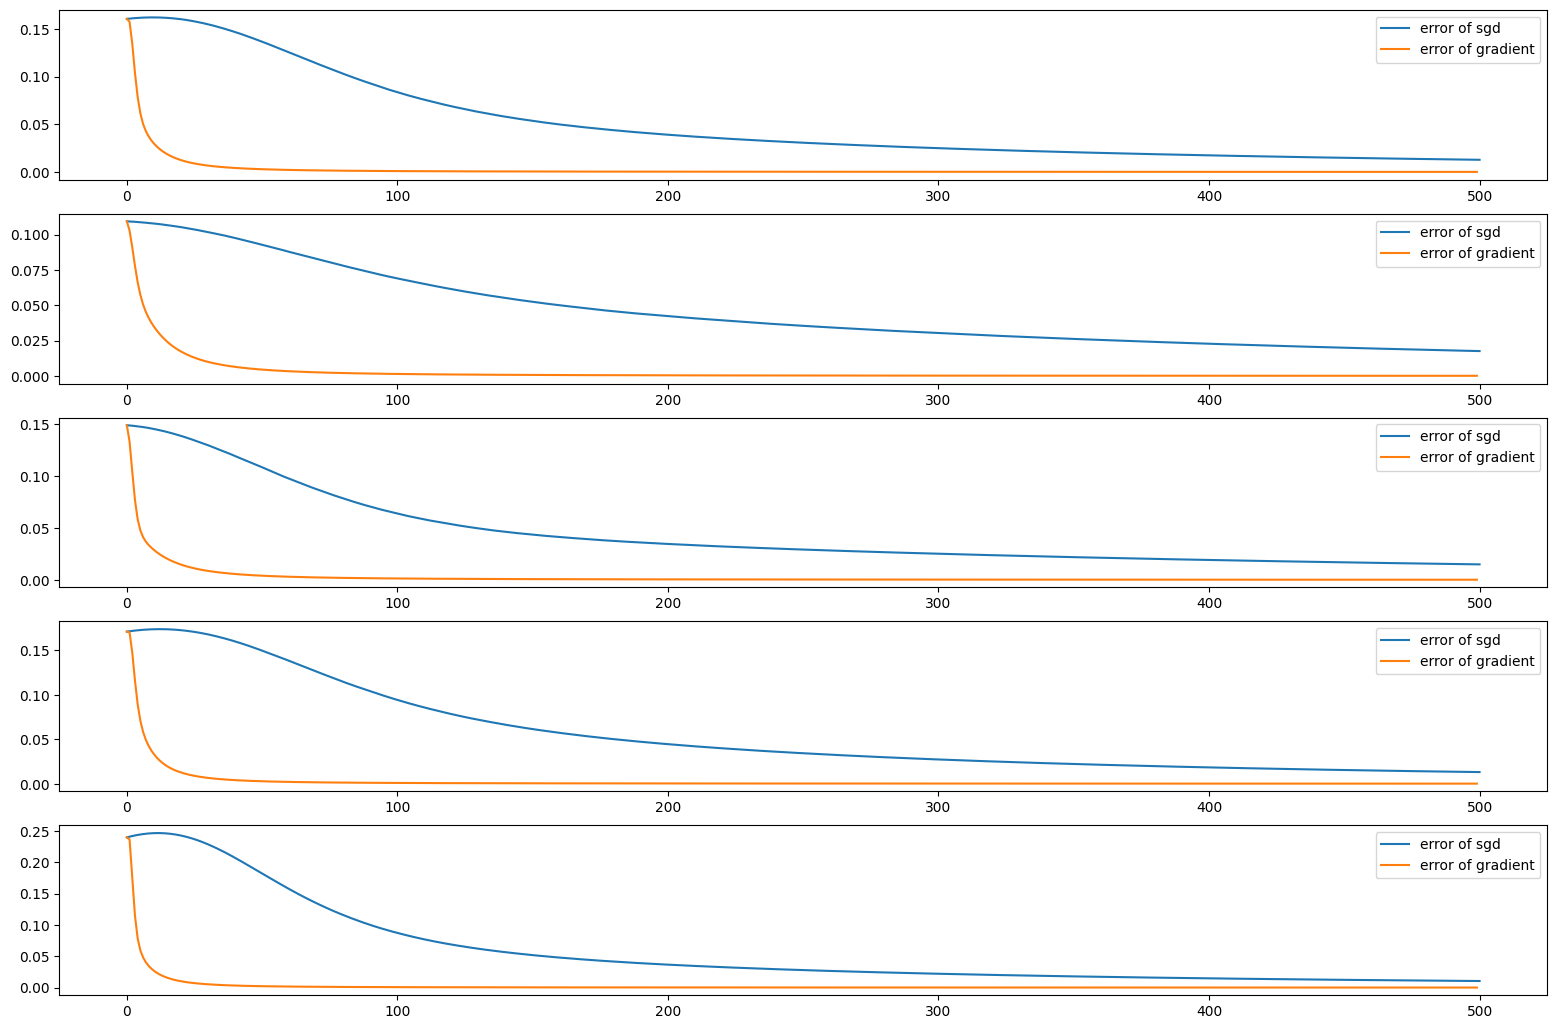

In [20]:
# plt.figure(figsize=(12.8,7.2))
fig, axs = plt.subplots(len(accuracies), figsize=(19.2,12.8))
i = 0
for el in accuracies:
    axs[i].plot(np.arange(0,n_epochs + 1, 1),el.extraSGD[3], label = "error of sgd")
    axs[i].plot(np.arange(0,500,1),el.extraGradient[4],  label = "error of gradient")
    axs[i].legend()
    i +=1
plt.show()